In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'



from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *
from plot_utils_1D import *

2024-10-16 16:33:21.986572: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 16:33:22.798982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-10-16 16:33:22.799064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-10-16 16:33:22.799073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
from scipy.signal import resample

N_objects = 5000
noise_sigma = 1e-3
num_nyquist_samples_list = [4, 9, 16, 25, 36]
max_epochs = 2000
confidence = .95
num_mi_models = 5

upsampled_signal_length = 3600 # LCM of 4, 9, 16, 25, 36

object_names = ['white_noise', 'delta_uniform', '8_deltas_uniform']

num_nyquist_samples = NUM_NYQUIST_SAMPLES


def white_noise_fn():
  # White noise object with 2x the bandwidth of the highest Nyquist frequency
  objects = []
  for i in range(N_objects):  
    obj = generate_random_object('white_noise', object_size=2*num_nyquist_samples_list[-1])
    # upsample it
    obj = resample(obj, upsampled_signal_length)
    # make positive and sum to 1
    obj -= np.min(obj)
    obj /= np.sum(obj)
    objects.append(obj)
  # print(objects[0].shape)
  return np.array(objects) 

delta_fn = lambda : np.array([generate_random_object('delta', num_deltas=1, object_size=upsampled_signal_length) for i in range(N_objects)])

delta8_fn = lambda :np.array([generate_random_object('delta', num_deltas=8, object_size=upsampled_signal_length) for i in range(N_objects)])


# plot an example of each object
wn = white_noise_fn()[0]
delta = delta_fn()[0]
delta8 = delta8_fn()[0]

white_noise


  0%|                                                                             | 0/5 [00:00<?, ?it/s]2024-10-16 16:56:47.218173: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.

training:  49%|███████████████████████████▍                            | 98/200 [01:35<01:38,  1.03it/s]

training:  49%|███████████████████████████▍                            | 98/200 [01:31<01:35,  1.07it/s]

training:  68%|█████████████████████████████████████▍                 | 136/200 [02:07<00:59,  1.07it/s]

training:  40%|██████████████████████                                  | 79/200 [01:14<01:53,  1.07it/s]

training:  42%|███████████████████████▌                                | 84/200 [01:21<01:53,  1.02it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:02,  2.45s/it]
Evaluating NLL: 7it [00:04,  1.42it/s]

Evaluating NLL: 0it [00:00, ?it/s]


delta_uniform


  0%|                                                       | 0/5 [00:00<?, ?it/s]
training:   0%| | 0/200
training:   0%| | 1/200
training:   1%| | 2/200
training:   2%| | 3/200
training:   2%| | 4/200
training:   2%| | 5/200
training:   3%| | 6/200
training:   4%| | 7/200
training:   4%| | 8/200
training:   4%| | 9/200
training:   5%| | 10/20
training:   6%| | 11/20
training:   6%| | 12/20
training:   6%| | 13/20
training:   7%| | 14/20
training:   8%| | 15/20
training:   8%| | 16/20
training:   8%| | 17/20
training:   9%| | 18/20
training:  10%| | 19/20
training:  10%| | 20/20
training:  10%| | 21/20
training:  11%| | 22/20
training:  12%| | 23/20
training:  12%| | 24/20
training:  12%|▏| 25/20
training:  13%|▏| 26/20
training:  14%|▏| 27/20
training:  14%|▏| 28/20
training:  14%|▏| 29/20
training:  15%|▏| 30/20
training:  16%|▏| 31/20
training:  16%|▏| 32/20
training:  16%|▏| 33/20
training:  17%|▏| 34/20
training:  18%|▏| 35/20
training:  18%|▏| 36/20
training:  18%|▏| 37/20
train

8_deltas_uniform


training: 100%|██████████████████████████████████| 200/200 [02:20<00:00,  1.42it/s]

training: 100%|██████████████████████████████████| 200/200 [02:21<00:00,  1.41it/s]

training:  66%|██████████████████████▌           | 133/200 [01:38<00:49,  1.35it/s]

training:  74%|████████████████████████▉         | 147/200 [01:51<00:40,  1.32it/s]

training: 100%|██████████████████████████████████| 200/200 [02:42<00:00,  1.23it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.02it/s]
Evaluating NLL: 7it [00:01,  3.73it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.06it/s]
Evaluating NLL: 7it [00:01,  3.71it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.06it/s]
Evaluating NLL: 7it [00:01,  3.82it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.05it/s]
Evaluating NLL: 7it [00:01,  3.78it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.08it/s]
Evaluating NLL: 7it [00:01,  3.82it/s]

Evalu

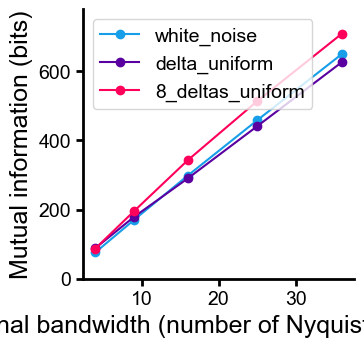

In [3]:

mi_by_object = {}
mi_by_object_hi = {}
mi_by_object_lo = {}
for name in object_names:
  print(name)
  mutual_information = []
  mi_hi = []
  mi_lo = []
  for num_nyquist_samples in tqdm(num_nyquist_samples_list):
    
    if name == 'delta_uniform':
      objects_fn = delta_fn
    elif name == '8_deltas_uniform':
      objects_fn = delta8_fn
    else:
      objects_fn = white_noise_fn

    
    initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi, optimized_mi_lower, optimized_mi_upper = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, num_nyquist_samples=num_nyquist_samples, upsampled_signal_length=upsampled_signal_length,
          estimate_with_pixel_cnn=True,
          max_epochs=max_epochs, confidence=confidence, num_mi_models=num_mi_models)

    mutual_information.append(optimized_mi)
    mi_lo.append(optimized_mi_lower)
    mi_hi.append(optimized_mi_upper)
  mi_by_object[name] = mutual_information
  mi_by_object_hi[name] = mi_hi
  mi_by_object_lo[name] = mi_lo


fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))

for object_name, mutual_information in mi_by_object.items():

    total_mi = np.array(mutual_information) * np.array(num_nyquist_samples_list)

    total_mi_hi = np.array(mi_by_object_hi[object_name]) * np.array(num_nyquist_samples_list)
    total_mi_lo = np.array(mi_by_object_lo[object_name]) * np.array(num_nyquist_samples_list)

    ax.plot(num_nyquist_samples_list, total_mi, 'o-', label=object_name)
    ax.fill_between(num_nyquist_samples_list, total_mi_lo, total_mi_hi, alpha=0.2)
    ax.set_xlabel('Signal bandwidth (number of Nyquist samples)')
    ax.set_ylabel('Mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))
    # ax.set(ylim=[0, 25])

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + f'mi_vs_bandwidth' + '.pdf', transparent=True)
